In [2]:
import pandas as pd

In [3]:

df = pd.read_csv(r"crop_yield.csv")

In [4]:
df.head(1)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816


In [4]:
df1 = df.copy()

In [5]:
df1.shape

(1000000, 10)

In [5]:
df.shape

(1000000, 10)

In [6]:
df.isnull().sum()


Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.head(1)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816


In [9]:
df['Region'].value_counts()

Region
North    250173
West     250074
South    250054
East     249699
Name: count, dtype: int64

In [10]:
df['Soil_Type'].value_counts()

Soil_Type
Sandy     167119
Loam      166795
Chalky    166779
Silt      166672
Clay      166352
Peaty     166283
Name: count, dtype: int64

In [11]:
df['Crop'].value_counts()

Crop
Maize      166824
Rice       166792
Barley     166777
Wheat      166673
Cotton     166585
Soybean    166349
Name: count, dtype: int64

In [12]:
df['Weather_Condition'].value_counts()

Weather_Condition
Sunny     333790
Rainy     333561
Cloudy    332649
Name: count, dtype: int64

In [13]:
df.head(1)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816


In [14]:
df.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

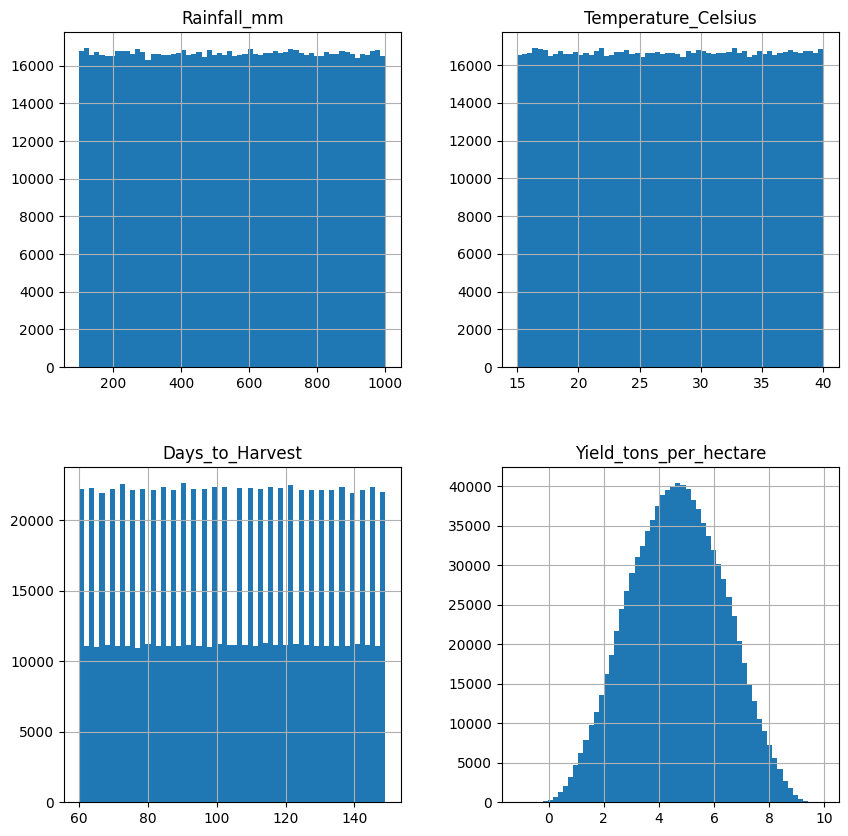

In [16]:
df.hist(bins=60,figsize=(10,10))
plt.show()

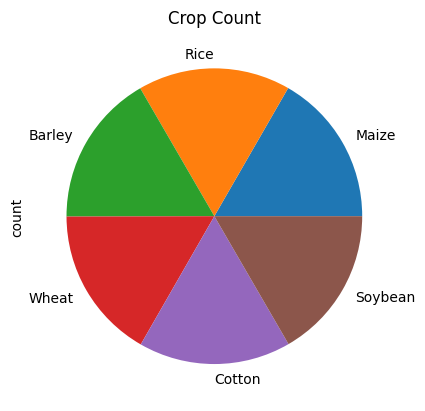

In [17]:
ax = df['Crop'].value_counts().plot(kind='pie', title='Crop Count')
plt.show()

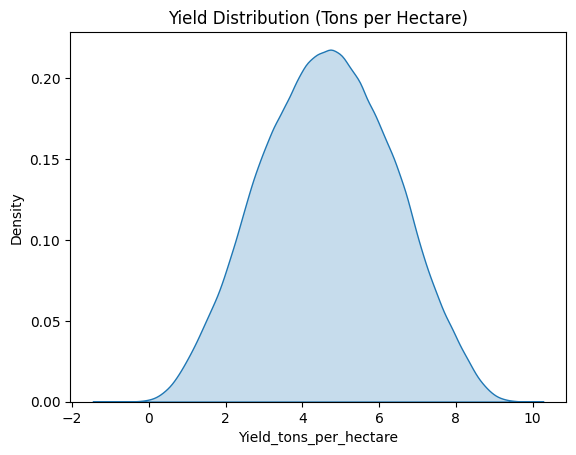

In [18]:
sns.kdeplot(df['Yield_tons_per_hectare'], fill=True)
plt.title('Yield Distribution (Tons per Hectare)')
plt.show()

C:\Users\Anuradha\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


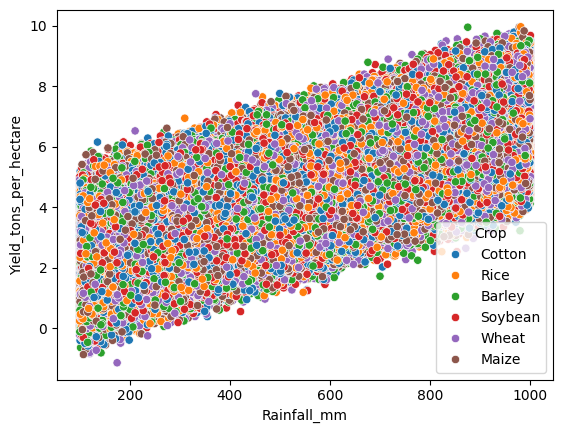

In [19]:
sns.scatterplot(x='Rainfall_mm',
                y='Yield_tons_per_hectare',
                hue = 'Crop',
                data = df)
plt.show()

<Axes: >

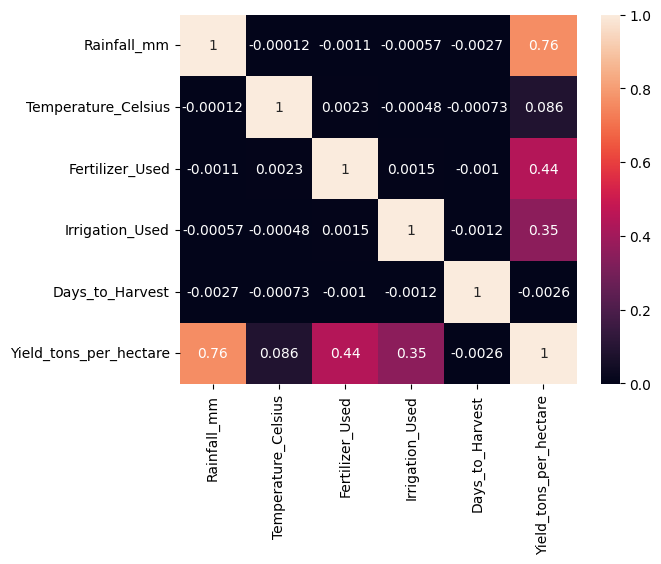

In [20]:
sns.heatmap(df.corr(numeric_only=True),annot = True)

In [21]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df['Region'] = le.fit_transform(df['Region'])
df['Soil_Type'] = le.fit_transform(df['Soil_Type'])
df['Crop'] = le.fit_transform(df['Crop'])
df['Fertilizer_Used'] = le.fit_transform(df['Fertilizer_Used'])
df['Irrigation_Used'] = le.fit_transform(df['Irrigation_Used'])
df['Weather_Condition'] = le.fit_transform(df['Weather_Condition'])

In [24]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,3,4,1,897.077239,27.676966,0,1,0,122,6.555816
1,2,1,3,992.673282,18.026142,1,1,1,140,8.527341
2,1,2,0,147.998025,29.794042,0,0,2,106,1.127443
3,1,4,4,986.866331,16.644190,0,1,1,146,6.517573
4,2,5,5,730.379174,31.620687,1,1,0,110,7.248251


In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['Rainfall_mm','Temperature_Celsius','Days_to_Harvest']]=scaler.fit_transform(df[['Rainfall_mm','Temperature_Celsius','Days_to_Harvest']])

In [26]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,3,4,1,1.335747,0.023821,0,1,0,0.674477,6.555816
1,2,1,3,1.703634,-1.312747,1,1,1,1.368028,8.527341
2,1,2,0,-1.546977,0.317020,0,0,2,0.057988,1.127443
3,1,4,4,1.681287,-1.504137,0,1,1,1.599212,6.517573
4,2,5,5,0.694233,0.569997,1,1,0,0.212110,7.248251


In [27]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score : ", r2_score(y_test, y_pred))

Mean Squared Error :  0.25123218433399097
Root Mean Squared Error :  0.5012306697858692
R2 score :  0.9126615534042641


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

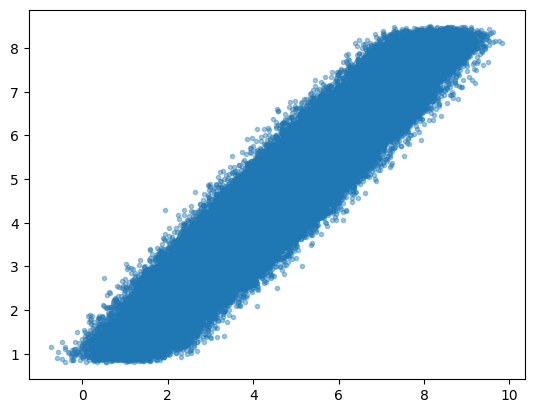

In [32]:
plt.scatter(y_test,y_pred,alpha=0.4,marker=".")
plt.show()

In [1]:
import pickle
pickle.dump(lr, open('LR.pkl', 'wb'))
pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(le, open('le.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

NameError: name 'lr' is not defined

In [40]:
df.head(1)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,3,4,1,1.335747,0.023821,0,1,0,0.674477,6.555816


In [39]:
X_train.head(1)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest
771718,2,2,3,-0.219262,0.455541,0,0,2,0.8286
